In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Lambda,Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
import os
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#url="https://drive.google.com/file/d/1y6FTQXEaZCWm-Ng4EhPXQyqI2WhPgWeG/view?usp=sharing"
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv('dataset/test.csv')
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 0664343c9a8f11ea.zip to 0664343c9a8f11ea.zip


In [ ]:
!unzip 0664343c9a8f11ea.zip

Archive:  0664343c9a8f11ea.zip
   creating: dataset/
   creating: dataset/test/
  inflating: dataset/test/508.jpg    
  inflating: dataset/test/246.jpg    
  inflating: dataset/test/473.jpg    
  inflating: dataset/test/485.jpg    
  inflating: dataset/test/128.jpg    
  inflating: dataset/test/410.jpg    
  inflating: dataset/test/465.jpg    
  inflating: dataset/test/196.jpg    
  inflating: dataset/test/340.jpg    
  inflating: dataset/test/467.jpg    
  inflating: dataset/test/306.jpg    
  inflating: dataset/test/171.jpg    
  inflating: dataset/test/323.jpg    
  inflating: dataset/test/332.jpg    
  inflating: dataset/test/330.jpg    
  inflating: dataset/test/170.jpg    
  inflating: dataset/test/479.jpg    
  inflating: dataset/test/9.jpg      
  inflating: dataset/test/283.jpg    
  inflating: dataset/test/114.jpg    
  inflating: dataset/test/507.jpg    
  inflating: dataset/test/183.jpg    
  inflating: dataset/test/200.jpg    
  inflating: dataset/test/457.jpg    
  inflat

In [3]:
base= 'dataset'
train_dir=os.path.join(str(base)+'/train/')
test_dir=os.path.join(str(base)+'/test/')

In [4]:
train_fnames=os.listdir(train_dir)
test_fnames=os.listdir(test_dir)

In [5]:
import cv2
img = cv2.imread('dataset/train/311.jpg')
 
dimensions = img.shape
dimensions

(330, 220, 3)

In [6]:
img_width=224
img_height=224

In [7]:
def train_data_preparation(list_of_images,train,train_dir):
    x=[]#Array of images
    y=[]# labels
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(train_dir+image),(img_width,img_height),interpolation=cv2.INTER_CUBIC))
        if image in list(train['Image']):
            y.append(train.loc[train['Image']==image,'target'].values[0])
    return x,y

In [8]:
import cv2
training_data,training_labels=train_data_preparation(train_fnames,train,train_dir)

KeyError: 'Image'

In [ ]:
training_labels

In [ ]:
def test_prepare_data(list_of_images,test_dir):
    x=[]
    for image in list_of_images:
        
        x.append(cv2.resize(cv2.imread(test_dir+image),(224,224),interpolation=cv2.INTER_CUBIC))
    return x    

In [9]:
testing_data=test_prepare_data(test_fnames,test_dir)

NameError: name 'test_prepare_data' is not defined

In [ ]:
def show_batch(image_batch,image_label):
    plt.figure(figsize=(12,12))
    for n in range(30):
        ax=plt.subplot(6,6,n+1)
        plt.imshow(image_batch[n])
        plt.title(image_label[n].title())
        plt.axis('off')

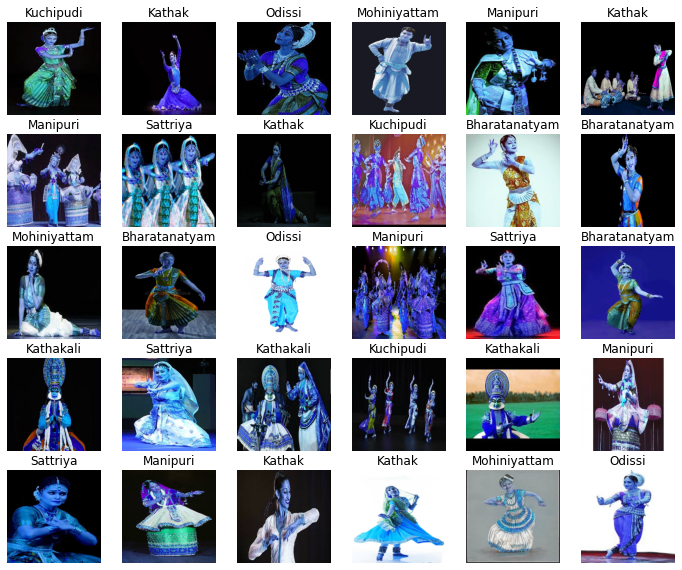

In [ ]:
show_batch(training_data,training_labels)

In [ ]:
le=LabelEncoder()
training_labels=le.fit_transform(training_labels)

In [ ]:
training_labels

array([3, 1, 6, 5, 4, 1, 4, 7, 1, 3, 0, 0, 5, 0, 6, 4, 7, 0, 2, 7, 2, 3,
       2, 4, 7, 4, 1, 1, 5, 6, 0, 0, 5, 6, 2, 3, 1, 7, 0, 7, 0, 2, 3, 3,
       7, 6, 0, 2, 2, 1, 3, 7, 0, 1, 1, 4, 5, 7, 2, 3, 7, 5, 0, 3, 2, 0,
       0, 5, 3, 1, 1, 4, 1, 2, 3, 1, 7, 6, 7, 1, 3, 2, 4, 7, 2, 7, 3, 4,
       5, 6, 6, 3, 2, 3, 2, 4, 0, 2, 0, 4, 4, 2, 4, 7, 5, 2, 1, 6, 2, 0,
       3, 6, 6, 1, 0, 3, 6, 7, 1, 4, 1, 5, 3, 3, 5, 6, 5, 3, 2, 5, 2, 0,
       7, 4, 2, 3, 3, 6, 6, 5, 5, 6, 7, 2, 7, 2, 7, 7, 1, 2, 0, 6, 0, 5,
       1, 2, 2, 6, 3, 6, 2, 1, 2, 0, 0, 1, 7, 4, 1, 6, 1, 7, 4, 7, 5, 0,
       3, 6, 6, 5, 7, 6, 3, 2, 6, 4, 6, 0, 4, 1, 3, 6, 7, 6, 4, 6, 5, 5,
       5, 3, 0, 3, 7, 1, 5, 3, 2, 6, 7, 1, 3, 2, 5, 3, 1, 5, 0, 1, 3, 6,
       5, 3, 6, 4, 5, 2, 4, 7, 2, 7, 0, 7, 5, 5, 1, 0, 6, 4, 7, 0, 4, 4,
       6, 7, 1, 2, 5, 1, 0, 7, 1, 6, 5, 7, 6, 7, 4, 3, 5, 0, 6, 6, 5, 4,
       2, 1, 7, 5, 2, 3, 0, 0, 1, 0, 5, 4, 5, 4, 4, 1, 5, 4, 0, 6, 2, 6,
       5, 2, 7, 1, 3, 1, 0, 1, 4, 5, 6, 1, 3, 3, 5,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(training_data,training_labels,test_size=0.33,random_state=42)

In [ ]:
y_train

array([1, 0, 1, 2, 6, 2, 7, 5, 4, 7, 3, 6, 2, 4, 0, 2, 0, 1, 7, 2, 7, 0,
       3, 5, 7, 4, 5, 2, 1, 1, 0, 2, 4, 2, 3, 3, 4, 7, 7, 3, 5, 0, 5, 3,
       7, 6, 7, 6, 3, 4, 4, 6, 0, 5, 6, 5, 6, 2, 5, 0, 0, 7, 4, 6, 5, 4,
       5, 7, 7, 6, 5, 0, 0, 3, 7, 1, 2, 6, 3, 1, 5, 1, 1, 5, 1, 0, 3, 3,
       4, 6, 7, 0, 6, 0, 6, 4, 6, 1, 7, 0, 0, 0, 7, 6, 1, 6, 5, 3, 5, 1,
       7, 0, 0, 2, 3, 0, 4, 7, 2, 4, 4, 6, 5, 3, 2, 6, 6, 2, 3, 1, 6, 6,
       5, 1, 4, 4, 3, 4, 4, 2, 3, 7, 0, 5, 5, 2, 5, 5, 0, 3, 1, 6, 0, 6,
       2, 2, 6, 0, 3, 2, 1, 2, 6, 2, 0, 1, 5, 0, 1, 3, 6, 6, 5, 3, 6, 5,
       0, 3, 3, 1, 3, 1, 3, 0, 2, 1, 1, 1, 3, 3, 2, 4, 3, 0, 2, 4, 0, 7,
       5, 0, 7, 0, 2, 3, 4, 6, 7, 1, 3, 5, 1, 1, 0, 6, 2, 2, 0, 5, 3, 2,
       2, 5, 6, 1, 6, 3, 4, 2, 2, 6, 4, 4, 5, 1, 5, 6, 2, 4, 4, 1, 0, 5,
       4])

In [ ]:
#Data Augmentation
train_datagenerator=ImageDataGenerator(rescale=1./255,
                                      featurewise_center=False,
                                      samplewise_center=False,
                                      rotation_range=40,
                                      zoom_range=0.20,
                                      width_shift_range=0.10,
                                       height_shift_range=0.10,
                                       horizontal_flip=True,
                                       vertical_flip=False)

test_datagenerator=ImageDataGenerator(rescale=1./255)


train_datagenerator.fit(X_train)
test_datagenerator.fit(X_test)
test_datagenerator.fit(testing_data)

X_train=np.array(X_train)
testing_data=np.array(testing_data)
X_test=np.array(X_test)

In [ ]:
#Training Using Transfer Learning
vggmodel=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3),pooling='max')


58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vggmodel.trainable=False
model=Sequential([
    vggmodel,
    Dense(units=1024,activation='relu',kernel_initializer='uniform'),
    Dropout(0.25),
    Dense(units=512,activation='relu'),
    Dropout(0.25),
    Dense(units=8,activation='softmax')
])

In [ ]:
reduce_learning_rate=ReduceLROnPlateau(monitor='loss',
                                      factor=0.1,
                                      patience=2,
                                      cooldown=2,
                                      min_lr=0.01,
                                      verbose=1)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit_generator(train_datagenerator.flow(X_train,to_categorical(y_train,8),batch_size=16),validation_data=test_datagenerator.flow(X_test,to_categorical(y_test,8),batch_size=16),verbose=2,epochs=15)

Epoch 1/15
16/16 - 4s - loss: 0.5403 - accuracy: 0.7942 - val_loss: 1.7470 - val_accuracy: 0.5372
Epoch 2/15
16/16 - 4s - loss: 0.4177 - accuracy: 0.8477 - val_loss: 1.6111 - val_accuracy: 0.5620
Epoch 3/15
16/16 - 4s - loss: 0.4453 - accuracy: 0.8601 - val_loss: 1.3727 - val_accuracy: 0.5950
Epoch 4/15
16/16 - 5s - loss: 0.4416 - accuracy: 0.8560 - val_loss: 1.4061 - val_accuracy: 0.5868
Epoch 5/15
16/16 - 4s - loss: 0.4591 - accuracy: 0.8354 - val_loss: 1.5821 - val_accuracy: 0.5702
Epoch 6/15
16/16 - 5s - loss: 0.4766 - accuracy: 0.8230 - val_loss: 1.2736 - val_accuracy: 0.6198
Epoch 7/15
16/16 - 4s - loss: 0.3524 - accuracy: 0.8724 - val_loss: 1.4363 - val_accuracy: 0.6281
Epoch 8/15
16/16 - 4s - loss: 0.4692 - accuracy: 0.8189 - val_loss: 1.2739 - val_accuracy: 0.6116
Epoch 9/15
16/16 - 4s - loss: 0.3772 - accuracy: 0.8477 - val_loss: 1.4351 - val_accuracy: 0.6033
Epoch 10/15
16/16 - 4s - loss: 0.4732 - accuracy: 0.8313 - val_loss: 1.6860 - val_accuracy: 0.5207
Epoch 11/15
16/16 -

In [ ]:
predictions=model.predict(testing_data)

In [ ]:
predictions

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.1989533e-06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        9.9999654e-01, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1665832e-08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.1027332e-27, 0.0000000e+00]], dtype=float32)

In [ ]:
predictions=[np.argmax(i) for i in predictions]

In [ ]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
target=le.inverse_transform(predictions)

In [ ]:
submission = pd.DataFrame({ 'Image': test.Image, 'target': target })

In [ ]:
submission.to_csv('output2.csv', index=False)

In [ ]:
submission

,Image,target
0,508.jpg,kathakali
1,246.jpg,kuchipudi
2,473.jpg,kuchipudi
3,485.jpg,bharatanatyam
4,128.jpg,kathakali
...,...,...
151,366.jpg,bharatanatyam
152,226.jpg,bharatanatyam
153,35.jpg,kathakali
154,458.jpg,bharatanatyam


In [ ]:
from google.colab import files
files.download("output2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Class_map={'manipuri':0, 'bharatanatyam':1, 'odissi':2 ,'kathakali':3, 'kathak':4, 'sattriya':5,
 'kuchipudi':6, 'mohiniyattam':7}
inverse_map={0:'manipuri', 1:'bharatanatyam', 2:'odissi' ,3:'kathakali',4: 'kathak', 5:'sattriya',
 6:'kuchipudi', 7:'mohiniyattam'}
train['target']=train['target'].map(Class_map)

In [ ]:
img_h,img_w= (224,224)

In [ ]:
import cv2
from tqdm import tqdm
train_img=[]
train_label=[]
j=0
path='dataset/train'
for i in tqdm(train['Image']):
    final_path=os.path.join(path,i)
    img=cv2.imread(final_path)
    img=cv2.resize(img,(img_h,img_w))
    img=img.astype('float32')
    train_img.append(img)
    train_label.append(train['target'][j])
    j=j+1

100%|██████████| 364/364 [00:02<00:00, 167.43it/s]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_img, train_label, test_size=0.30, shuffle= True)

In [ ]:
test_img=[]
path='dataset/test'
for i in tqdm(test['Image']):
    final_path=os.path.join(path,i)
    img=cv2.imread(final_path)
    img=cv2.resize(img,(img_h,img_w))
    img=img.astype('float32')
    test_img.append(img)

100%|██████████| 156/156 [00:01<00:00, 155.54it/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,# divide each input by its std
        rescale=1./255,
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

test_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)
train_datagen.fit(x_train)
test_datagen.fit(test_img)
valid_datagen.fit(x_valid)

In [ ]:
train_img=np.array(train_img)
x_train= np.array(x_train)
x_valid= np.array(x_valid)
y_train= np.array(y_train)
y_valid= np.array(y_valid)
test_img=np.array(test_img)
train_label=np.array(train_label)
print("Shape of training data=",x_train.shape," and shape of labels of training data= ",y_train.shape)
print("Shape of validation data=",x_valid.shape," and shape of labels of validation data= ",y_valid.shape)
print("Shape of test data=",test_img.shape)

Shape of training data= (254, 224, 224, 3)  and shape of labels of training data=  (254,)
Shape of validation data= (110, 224, 224, 3)  and shape of labels of validation data=  (110,)
Shape of test data= (156, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import Dropout

base_model= InceptionResNetV2(include_top=False, weights='imagenet', 
                              input_tensor=None, input_shape=(img_h,img_w,3), pooling='avg')

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
base_model.trainable=False
    
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
#model.add(BatchNormalization())

model.add(Dense(8,activation='softmax'))


from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop


#NASnet.trainable=False

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]


model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 1536)              54336736  
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1536)              0         
_________________________________________________________________
batch_normalization_203 (Bat (None, 1536)              6144      
_________________________________________________________________
dense (Dense)                (None, 512)               786944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_204 (Bat (None, 512)               2

Using TensorFlow backend.


In [ ]:
model.fit(train_datagen.flow(x_train, to_categorical(y_train,8), batch_size=32),
                    epochs=10,
          callbacks=callbacks,
          validation_data= valid_datagen.flow(x_valid, to_categorical(y_valid,8), batch_size=32),
          verbose=1
             )

Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 2.5146 - accuracy: 0.1929 - val_loss: 2.7004 - val_accuracy: 0.2727 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - 5s 613ms/step - loss: 1.9745 - accuracy: 0.4213 - val_loss: 2.7640 - val_accuracy: 0.2636 - lr: 0.0010
Epoch 3/10
8/8 [==============================] - 5s 609ms/step - loss: 1.5373 - accuracy: 0.5039 - val_loss: 1.8072 - val_accuracy: 0.3545 - lr: 0.0010
Epoch 4/10
8/8 [==============================] - 5s 611ms/step - loss: 1.3087 - accuracy: 0.5709 - val_loss: 1.5193 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
8/8 [==============================] - 5s 621ms/step - loss: 1.2865 - accuracy: 0.5906 - val_loss: 1.3710 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 6/10
8/8 [==============================] - 5s 625ms/step - loss: 1.1631 - accuracy: 0.6575 - val_loss: 1.2824 - val_accuracy: 0.5909 - lr: 0.0010
Epoch 7/10
8/8 [==============================] - 5s 621ms/step - loss: 1.1558 - acc

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50
base_model_2= ResNet50(include_top=False, weights='imagenet',input_shape=(img_h,img_w,3), pooling='max')

'''for layer in base_model_2.layers[:-3]:
    layer.trainable=False'''
base_model_2.trainable=False
    
model_2=Sequential()
model_2.add(base_model_2)
model_2.add(Flatten())
model_2.add(Dropout(0.4))
model_2.add(BatchNormalization())

model_2.add(Dense(768, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(BatchNormalization())

model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(BatchNormalization())


model_2.add(Dense(8,activation='softmax'))

model_2.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_2.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_205 (Bat (None, 2048)              8192      
_________________________________________________________________
dense_2 (Dense)              (None, 768)               1573632   
_________________________________________________________________
dropout_3 (Dropout)          (None, 768)               0         
_______________________________________________________

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50
base_model_2= ResNet50(include_top=False, weights='imagenet',input_shape=(img_h,img_w,3), pooling='max')

'''for layer in base_model_2.layers[:-3]:
    layer.trainable=False'''
base_model_2.trainable=False
    
model_2=Sequential()
model_2.add(base_model_2)
model_2.add(Flatten())
model_2.add(Dropout(0.4))
model_2.add(BatchNormalization())

model_2.add(Dense(768, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(BatchNormalization())

model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(BatchNormalization())


model_2.add(Dense(8,activation='softmax'))

model_2.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_208 (Bat (None, 2048)              8192      
_________________________________________________________________
dense_5 (Dense)              (None, 768)               1573632   
_________________________________________________________________
dropout_6 (Dropout)          (None, 768)               0         
_________________________________________________________________
batch_normalization_209 (Bat (None, 768)              

In [ ]:
model_2.fit(train_datagen.flow(x_train, to_categorical(y_train,8), batch_size=32),
                    epochs=10,
          callbacks=callbacks,
          validation_data= valid_datagen.flow(x_valid, to_categorical(y_valid,8), batch_size=32),
          verbose=1
             )

Epoch 1/10
8/8 [==============================] - 6s 719ms/step - loss: 2.7801 - accuracy: 0.1693 - val_loss: 2.9081 - val_accuracy: 0.0909 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - 4s 485ms/step - loss: 2.7906 - accuracy: 0.1654 - val_loss: 2.9138 - val_accuracy: 0.1182 - lr: 0.0010
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 2.7821 - accuracy: 0.1378
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
8/8 [==============================] - 4s 486ms/step - loss: 2.7821 - accuracy: 0.1378 - val_loss: 2.6269 - val_accuracy: 0.1182 - lr: 0.0010
Epoch 4/10
8/8 [==============================] - 4s 488ms/step - loss: 2.5472 - accuracy: 0.1811 - val_loss: 2.4775 - val_accuracy: 0.1182 - lr: 1.0000e-04
Epoch 5/10
8/8 [==============================] - 4s 486ms/step - loss: 2.5261 - accuracy: 0.1811 - val_loss: 2.3560 - val_accuracy: 0.1091 - lr: 1.0000e-04
Epoch 6/10
8/8 [==============================] - 4s 486ms/step -

In [ ]:
predictions_2=model.predict(test_img)

In [ ]:
predictions_2

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
predictions_2=[np.argmax(i) for i in predictions_2]

In [ ]:
labels = model.predict(test_img)
print(labels[:4])
label = [np.argmax(i) for i in labels]
class_label = [inverse_map[x] for x in label]
print(class_label[:3])
submission = pd.DataFrame({ 'Image': test.Image, 'target': class_label })
submission.head(10)
submission.to_csv('submission.csv', index=False)

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
['bharatanatyam', 'bharatanatyam', 'bharatanatyam']


In [ ]:
from google.colab import files
files.download("submission2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate
def stacking_ensemble(members,input_shape,n_classes):
  commonInput = Input(shape=input_shape)
  out=[]

  for model in members:
    #model._name= model._name+"test"+ str(members.index(model)+1)
    model._name= model.get_layer(index = 0)._name +"-test"+ str(members.index(model)+1)
    out.append(model(commonInput))

  modeltmp = concatenate(out,axis=-1)
  modeltmp = Dense(32, activation='relu')(modeltmp)
  modeltmp = Dense(16, activation='relu')(modeltmp)
  modeltmp = Dense(n_classes, activation='softmax')(modeltmp)
  stacked_model = Model(commonInput,modeltmp)
  stacked_model.compile( loss='categorical_crossentropy',optimizer= 'adam', metrics=['accuracy'])

  return stacked_model

In [ ]:
#members=[model,model_2,model_3]
members=[model,model_2,model_3]

In [ ]:
stacked_model= stacking_ensemble(members,(img_h,img_w,3),8)
stacked_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
inception_resnet_v2-test1 (Sequ (None, 8)            55135976    input_5[0][0]                    
__________________________________________________________________________________________________
resnet50-test2 (Sequential)     (None, 8)            25372552    input_5[0][0]                    
__________________________________________________________________________________________________
vgg19-test3 (Sequential)        (None, 8)            20176008    input_5[0][0]                    
______________________________________________________________________________________________

In [ ]:
stacked_model.fit(train_datagen.flow(x_train, to_categorical(y_train,8), batch_size=32),
                    epochs=10,
          callbacks=callbacks,
          validation_data= valid_datagen.flow(x_valid, to_categorical(y_valid,8), batch_size=32),
          verbose=1
             )

Epoch 1/10
8/8 [==============================] - 18s 2s/step - loss: 2.0411 - accuracy: 0.2087 - val_loss: 1.9885 - val_accuracy: 0.3909 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 1.9716 - accuracy: 0.3661 - val_loss: 1.9717 - val_accuracy: 0.4273 - lr: 0.0010
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 1.9299 - accuracy: 0.3858 - val_loss: 1.9350 - val_accuracy: 0.4273 - lr: 0.0010
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 1.8728 - accuracy: 0.4291 - val_loss: 1.8027 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 1.8267 - accuracy: 0.4449 - val_loss: 1.7303 - val_accuracy: 0.5636 - lr: 0.0010
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 1.7712 - accuracy: 0.4843 - val_loss: 1.6780 - val_accuracy: 0.6091 - lr: 0.0010
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 1.6985 - accuracy: 0.515

In [ ]:
labels = stacked_model.predict(test_img)
print(labels[:4])
label = [np.argmax(i) for i in labels]
class_label = [inverse_map[x] for x in label]
print(class_label[:3])
submission = pd.DataFrame({ 'Image': test.Image, 'target': class_label })
submission.head(10)
submission.to_csv('submission2.csv', index=False)

[[0.13296227 0.18471025 0.13072443 0.12405092 0.13085385 0.10443
  0.09434628 0.09792199]
 [0.13296227 0.18471025 0.13072443 0.12405092 0.13085385 0.10443
  0.09434628 0.09792199]
 [0.13545741 0.10768549 0.10899014 0.09259269 0.14779156 0.16393833
  0.0982182  0.14532618]
 [0.13296227 0.18471023 0.1307244  0.12405092 0.13085385 0.10443
  0.09434628 0.09792198]]
['bharatanatyam', 'bharatanatyam', 'sattriya']


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input
base_model_3=VGG19(include_top=False, weights='imagenet',input_shape=(img_h,img_w,3), pooling='max')

for layer in base_model_3.layers[:-4]:
    layer.trainable=False
#base_model_3.trainable=False
    
model_3=Sequential()
model_3.add(base_model_3)
model_3.add(Flatten())

model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))


model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())


model_3.add(Dense(64, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))



model_3.add(Dense(8,activation='softmax'))

model_3.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_3.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 512)               20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
batch_normalization_211 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_212 (Bat (None, 256)               1024      
_______________________________________________________

In [ ]:
model_3.fit(train_datagen.flow(x_train, to_categorical(y_train,8), batch_size=32),
                    epochs=20,
          callbacks=callbacks,
          validation_data= valid_datagen.flow(x_valid, to_categorical(y_valid,8), batch_size=32),
          verbose=1
             )

Epoch 1/20
8/8 [==============================] - 9s 1s/step - loss: 2.4170 - accuracy: 0.2402 - val_loss: 4.9277 - val_accuracy: 0.2727 - lr: 0.0010
Epoch 2/20
8/8 [==============================] - 5s 573ms/step - loss: 1.8147 - accuracy: 0.3740 - val_loss: 8.9273 - val_accuracy: 0.2364 - lr: 0.0010
Epoch 3/20
8/8 [==============================] - 5s 574ms/step - loss: 1.4797 - accuracy: 0.4843 - val_loss: 11.9410 - val_accuracy: 0.1818 - lr: 0.0010
Epoch 4/20
8/8 [==============================] - 5s 577ms/step - loss: 1.2558 - accuracy: 0.5276 - val_loss: 9.7912 - val_accuracy: 0.3091 - lr: 0.0010
Epoch 5/20
8/8 [==============================] - 5s 579ms/step - loss: 1.1281 - accuracy: 0.5787 - val_loss: 8.2260 - val_accuracy: 0.3727 - lr: 0.0010
Epoch 6/20
8/8 [==============================] - 5s 573ms/step - loss: 1.0582 - accuracy: 0.6339 - val_loss: 5.3602 - val_accuracy: 0.4636 - lr: 0.0010
Epoch 7/20
8/8 [==============================] - 5s 578ms/step - loss: 0.9673 - acc